In [2]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
data = pd.read_csv("advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
data.shape

(200, 4)

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

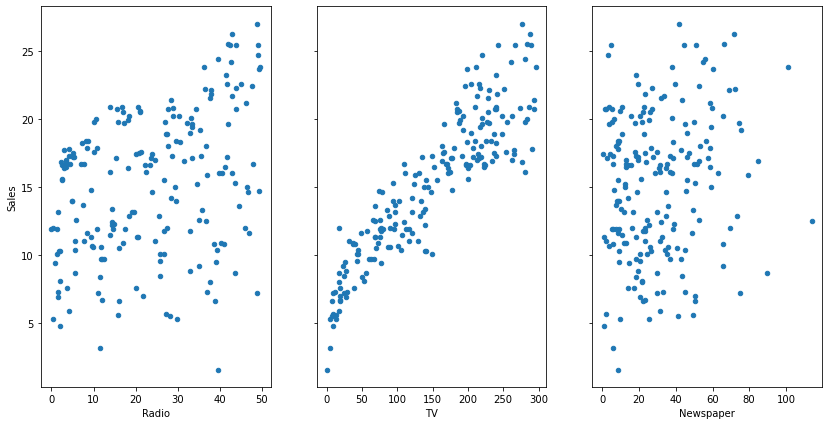

In [46]:
fig, axs =plt.subplots(1, 3, sharey=True)
data.plot(kind ='scatter',x='Radio', y='Sales', ax=axs[0], figsize=(14,7))
data.plot(kind ='scatter', x='TV',y='Sales',ax=axs[1])
data.plot(kind ='scatter', x='Newspaper',y='Sales',ax=axs[2])

In [47]:
feature_cols =['Radio']
X = data[feature_cols]
y = data.Sales
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X,y)

print(lm.intercept_)
print(lm.coef_)

12.235721966369235
[0.12443166]


In [48]:
12.235721966369235 +0.12443166*50

18.457304966369236

In [49]:
X_new = pd.DataFrame({'Radio':[200]})
X_new.head()

,Radio
0,200


In [50]:
lm.predict(X_new)

array([37.12205307])

In [51]:
X_new = pd.DataFrame({'Radio':[data.TV.min(),data.TV.max()]})
X_new.head()

,Radio
0,0.7
1,296.4


In [52]:
preds = lm.predict(X_new)
print(preds)

[12.32282413 49.11726466]


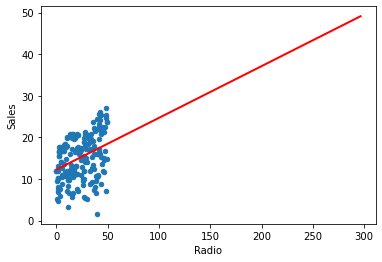

In [53]:
data.plot(kind='scatter',x='Radio',y='Sales')
plt.plot(X_new,preds,c='red',linewidth=2)

In [54]:
import statsmodels.formula.api as smf
lm = smf.ols(formula = 'Sales ~ Radio',data=data).fit()
lm.conf_int()

,0,1
Intercept,10.947036,13.524408
Radio,0.077703,0.171161


In [55]:
lm.pvalues

Intercept    1.081986e-45
Radio        3.882892e-07
dtype: float64

In [56]:
lm.rsquared

0.12224190399478618

In [57]:
feature_cols = ['Radio', 'TV', 'Newspaper']
X = data[feature_cols]
y = data.Sales

lm = LinearRegression()
lm.fit(X, y)

print(lm.intercept_)
print(lm.coef_)

4.625124078808653
[0.10700123 0.05444578 0.00033566]


In [58]:
lm = smf.ols(formula='Sales ~ Radio+TV+Newspaper',data=data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Thu, 31 Dec 2020   Prob (F-statistic):           8.13e-99
Time:                        13:18:54   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.000       4.019       5.232
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
lm = smf.ols(formula = 'Sales ~ Radio+TV',data=data).fit()
lm.rsquared

0.9025896186081139

In [60]:
lm = smf.ols(formula = 'Sales ~ Newspaper+Radio+TV',data=data).fit()
lm.rsquared

0.9025912899684558